In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [4]:
views = df.query('action == "view"')

In [5]:
views

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437
...,...,...,...,...,...
4067,2017-01-18 08:35:44.813986,313521,control,view,131.677707
4069,2017-01-18 09:39:08.046251,931490,control,view,58.846204
4071,2017-01-18 09:56:26.948171,364458,control,view,293.490566
4072,2017-01-18 10:10:18.293253,443603,experiment,view,149.026959


In [6]:
reading_times = views.groupby(['id','group'])['duration'].mean()
reading_times.head()

id      group     
183260  control       107.331484
183615  experiment     24.627594
184277  experiment    193.212489
184360  experiment    226.586283
184589  experiment     12.052097
Name: duration, dtype: float64

In [7]:
views.shape

(3260, 5)

In [8]:
reading_times =  reading_times.reset_index()

In [9]:
reading_times

,id,group,duration
0,183260,control,107.331484
1,183615,experiment,24.627594
2,184277,experiment,193.212489
3,184360,experiment,226.586283
4,184589,experiment,12.052097
...,...,...,...
3226,936970,experiment,8.178883
3227,936988,control,138.850240
3228,937001,control,117.341754
3229,937035,experiment,38.500533


In [10]:
# control group mean 
control_mean = df.query('group == "control"')['duration'].mean()
control_mean

115.40710650582038

In [11]:
# experiment group mean 
exp_mean = df.query('group == "experiment"')['duration'].mean()
exp_mean

130.93220512539477

In [12]:
# observed difference 
obs_diff = exp_mean - control_mean
obs_diff

15.525098619574393

In [14]:
# bootsampling distribution 
diffs= []
for _ in range(10000):
    b_samp = df.sample(df.shape[0],replace=True)
    control_mean = b_samp.query('group == "control"')['duration'].mean()
    exp_mean = b_samp.query('group == "experiment"')['duration'].mean()
    diffs.append(exp_mean - control_mean)
    

In [15]:
diffs = np.array(diffs)

(array([1.600e+01, 1.690e+02, 8.270e+02, 2.164e+03, 3.202e+03, 2.429e+03,
        9.430e+02, 2.230e+02, 2.600e+01, 1.000e+00]),
 array([ 7.1283797 ,  8.96933498, 10.81029026, 12.65124555, 14.49220083,
        16.33315611, 18.17411139, 20.01506667, 21.85602195, 23.69697724,
        25.53793252]),
 <BarContainer object of 10 artists>)

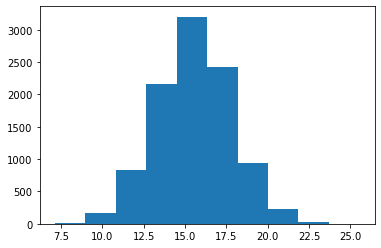

In [16]:
plt.hist(diffs)

In [18]:
null_vals = np.random.normal(0, diffs.std(), diffs.size)

(array([   8.,   79.,  454., 1475., 2787., 2873., 1676.,  538.,   91.,
          19.]),
 array([-8.83717805, -7.08761359, -5.33804914, -3.58848468, -1.83892023,
        -0.08935577,  1.66020868,  3.40977314,  5.15933759,  6.90890205,
         8.6584665 ]),
 <BarContainer object of 10 artists>)

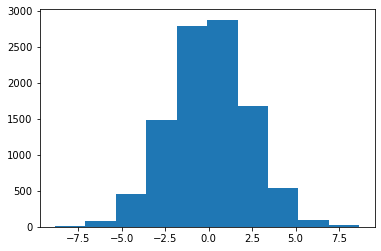

In [19]:
plt.hist(null_vals)

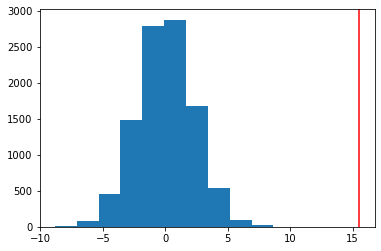

In [20]:
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red')